# 概率论

In [24]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [25]:
# 构建一个公平的概率分布 
fair_probs = torch.ones([6]) / 6  

# torch.Multinomial()表示多项式分布,第一个参数1表示样本数,第二个参数fair_probs表示概率分布（投掷一个6面骰子一次）
sample = multinomial.Multinomial(1, fair_probs).sample() 

# sample包含1个随机整数,取值范围为0-5
# 由于fair_probs公平分布,所以每个值被采样的概率都为1/6
fair_probs, sample

(tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]),
 tensor([1., 0., 0., 0., 0., 0.]),
 Multinomial())

In [26]:
# 十个样本
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 3., 3., 2., 1., 0.])

In [28]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(100000, fair_probs).sample()
counts / 100000  # 相对频率作为估计值

tensor([0.1691, 0.1653, 0.1687, 0.1656, 0.1663, 0.1651])

torch.Size([500, 6])

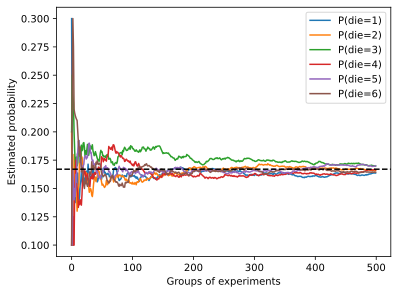

In [42]:
# 生成500组随机采样,每组10次
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
# 计算累积采样次数
cum_counts = counts.cumsum(dim=0)
# 计算每个面被抽取的概率估计
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
# 绘制每个面估计概率随实验组变化图
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
# 添加参考直线
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
# 在图中生成图例框
d2l.plt.legend()
estimates.size()